/Users/winston/anaconda2/envs/statsmodeldevenv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


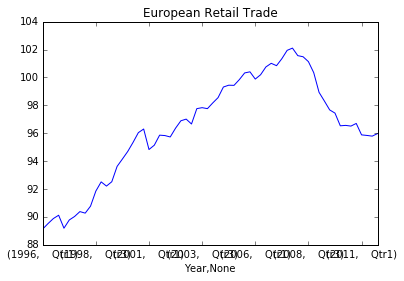

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('../../assets/data/euretail.csv')
df = df.set_index(['Year'])
df.stack().plot(title='European Retail Trade')

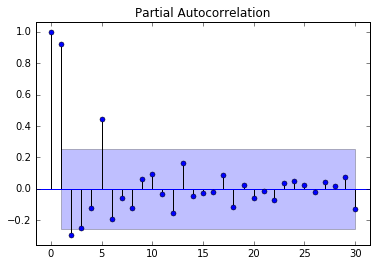

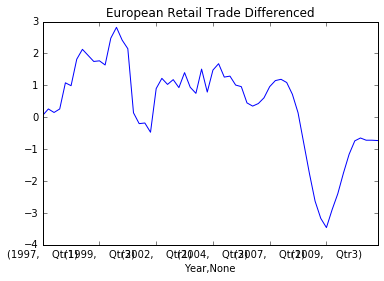

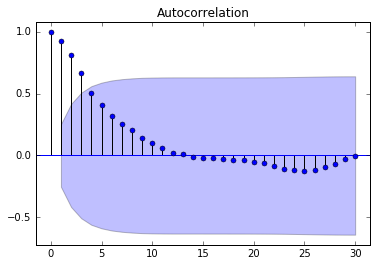

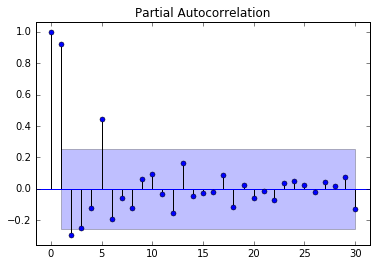

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff0 = df.stack().diff(periods=4)[4:]
diff0.plot(title='European Retail Trade Differenced')
plot_acf(diff0, lags=30)
plot_pacf(diff0, lags=30)

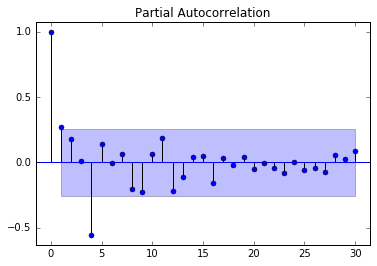

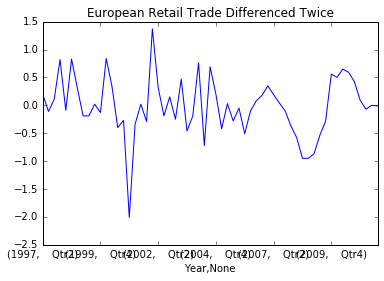

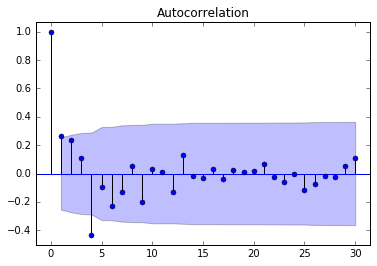

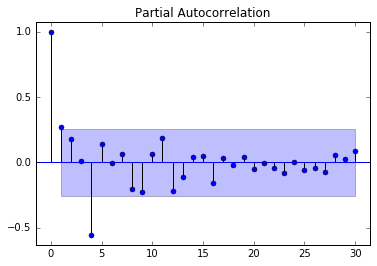

In [3]:
diff1 = diff0.diff()[1:]
diff1.plot(title='European Retail Trade Differenced Twice')
plot_acf(diff1, lags=30)
plot_pacf(diff1, lags=30)

In [4]:
import statsmodels.api as sm
data = df.stack().values
model = sm.tsa.statespace.SARIMAX(data, order=(0,1,1), seasonal_order=(0,1,1,4))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   64
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 -34.680
Date:                           Fri, 05 Aug 2016   AIC                             75.360
Time:                                   07:54:32   BIC                             81.837
Sample:                                        0   HQIC                            77.912
                                            - 64                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2901      0.155      1.869      0.062      -0.014       0.594
ma.S.L4       -0.6909      0.132     -5.241      0.000      -0.949      -0.432
sigma2         0.1812      0.034      5.307      0.000       0.114       0.248
===================================================================================
Ljung-Box (Q):                       33.87   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.74   Prob(JB):                         0.39
Heteroskedasticity (H):               0.76   Skew:                            -0.22
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

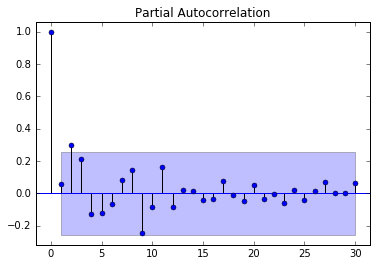

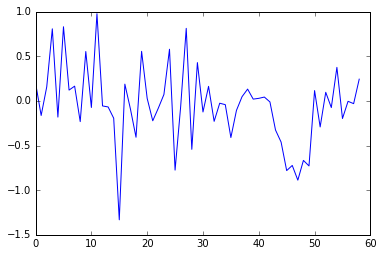

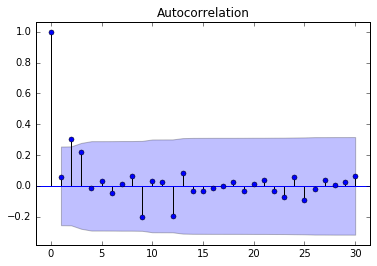

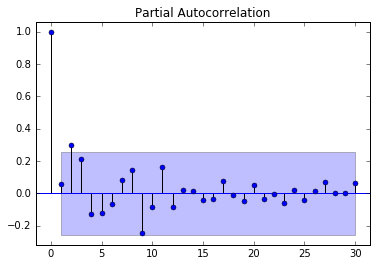

In [5]:
# Don't plot the first 5 values, to account for data loss when differencing (d=1 + D=5)
residuals = results.resid[5:]
plt.plot(residuals)

plot_acf(residuals, lags=30)
plot_pacf(residuals, lags=30)

In [6]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lags = min(10, len(residuals)/5)

acorr_ljungbox(residuals, lags=lags)


(array([  0.21600664,   6.07225727,   9.26518868,   9.27821293,
          9.33358682,   9.4980814 ,   9.50837893,   9.82023629,
         12.83638373,  12.90102786]),
 array([ 0.64209965,  0.04802043,  0.02596514,  0.05450947,  0.09647572,
         0.14744284,  0.21818607,  0.27787042,  0.17015056,  0.22925824]))

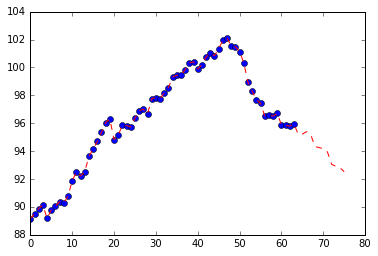

In [7]:
model = sm.tsa.statespace.SARIMAX(data, order=(0,1,3), seasonal_order=(0,1,1,4), trend='c')
res = model.fit()

preds = res.forecast(12)
fcast = np.concatenate((data, preds), axis=0)

plt.figure();
plt.plot(data, 'o' , fcast, 'r--');